In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r'data/deertrail.csv', parse_dates=['datetime'], engine='python')
df.head()
df.shape

(282643, 13)

C:\Users\iaxelrad\.virtualenvs\gpmr-cdOz5McO\lib\site-packages\pandas\core\indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


<AxesSubplot:>

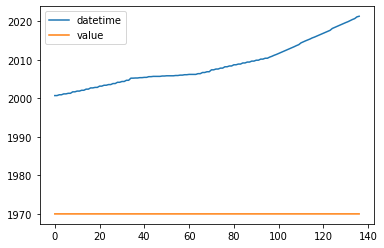

In [33]:
f = df[df['method'] == 'Field']
fm = f.set_index(['location', 'parameter', 'datetime'])
fm.loc[('Cell2-LCS', 'pH'), ['value']].reset_index().plot(x='datetime', y='value', marker='o')

In [ ]:
dfmi = df.set_index(['location', 'parameter', 'datetime']).sort_index()
subpop = dfmi.loc[('L3-42', 'Lead (Total)'),
                  :].reset_index(level='datetime')
subpop

In [ ]:
t = df['value'].fillna(value=df['detection_limit']/2)
#df.loc[df['parameter'] == 'Zinc (Total)', ['detection_limit']]
df['detection_limit'].isna().sum()

In [ ]:
# df.loc[(df['parameter'].str.contains(', Field', regex=False)) & (df['method'].isna()), ['method']] = "Field"
# df.sample(50)
df.loc[(df['Parameter'].str.contains(', Field', regex=False))]

In [ ]:
# some info
df.dtypes
df.groupby("location").mean()
df['Value'].isnull().sum()
df['Value'].count()
len(df['CAS'].unique())
len(df['parameter'].unique())
# Fill with half of detection limit?
df.fillna(0)

In [ ]:
dfmi = df.set_index(['location', 'parameter', 'datetime']).sort_index()
# multi.head(25)
# subpop = dfmi.xs('L3-42')
# subsubpop = subpop.xs('1,1,1-Trichloroethane')
# subsubpop
#subpop = dfmi.xs(('L3-42', 'trans-1,2-Dichloroethene'))
subpop = dfmi.loc[('L3-42', 'trans-1,2-Dichloroethene'),
                  :].reset_index(level='datetime')
subpop.unit[0]

In [ ]:
sub_df = df[(df['location'] == 'L4-33') & (df['parameter'].isin(['Gross Alpha']))]
ax = sub_df.plot(x='datetime', y='Value', kind='line', logy=True, subplots=False, marker='o', label='Gross Alpha')

sub_df.plot(x='datetime', y='detection_limit', kind='line', logy=True,
            subplots=False, marker='o', label='Detection Limit', ax=ax)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.75, 1])
# sub_df2 = df[(df['location'] == 'L4-33') &
#             (df['DetectionLimit'].isin(['Fluoride']))]
# sub_df2.plot(x='datetime', y='Value', kind='line', logy=True,
#             subplots=False, marker='o', label='dl',ax=ax)



In [ ]:
fig = plt.figure(figsize=(7.75, 7))
ax = fig.add_subplot(111)
#
ax.plot(sub_df['datetime'], sub_df['value'],
        label=sub_df.iloc[0]['parameter'], marker='o')
#
plt.title("Concentration vs. Time")
ax.set_xlabel("datetime")
ax.set_ylabel(f"Concentration ({sub_df.iloc[0]['unit']})")
ax.axes.set_yscale('log')
plt.style.use('seaborn')
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

In [ ]:
#sub_df.unstack(level=1).plot(kind='line', subplots=True)